In [2]:
# Import the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Load a CSV file into a Pandas DataFrame
df = pd.read_csv("datos_limpios_Empresas.csv")

In [ ]:
# Return a tuple representing the dimensionality of the DataFrame.
# First value  = Number of Rows including the header.
# Second value = Number of Columns.
df.shape

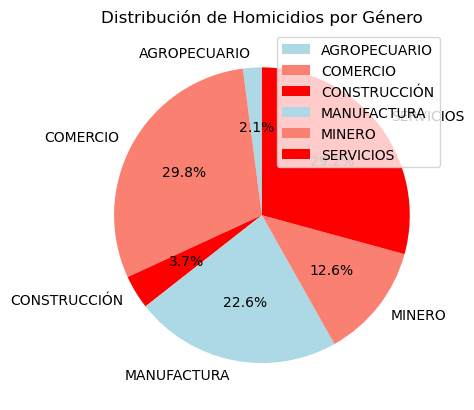

In [4]:
# Group by 'GENERO' and sum the 'CANTIDAD' values
tabla_muertes = df.groupby('MACROSECTOR')['INGRESOS_OPERACIONALES'].sum()

# Chart title
plt.title('Distribución de Homicidios por Género')

# plt.pie() is the function that creates the pie chart.
# tabla_muertes: The data we want to display in the pie chart.
# labels=tabla_muertes.index: We use the DataFrame index values ​​(GENERO) as labels for each slice of the pie.
# autopct='%1.1f%%': This shows the percentage of each category in each slice of the pie to one decimal place.
# startangle=90: Sets the starting angle for the graph to start from the top (90 degrees).
# colors=['lightblue', 'salmon']: Assign specific colors to each slice of the cake (you can change these colors to your preference).

# With percentage
plt.pie(tabla_muertes, labels=tabla_muertes.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon', 'red'])

# With values
#plt.pie(tabla_muertes, labels=tabla_muertes.index, autopct=lambda p: f'{int(p * sum(tabla_muertes) / 100):,}', startangle=90, colors=['lightblue', 'salmon', 'red'])

# Show the legend
plt.legend()

# Show the graph
plt.show()


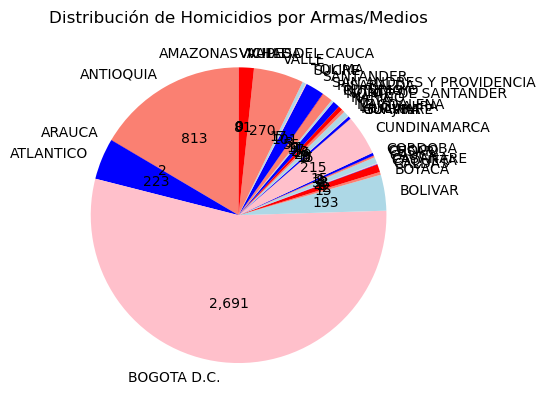

In [5]:
# Group by 'ARMAS_MEDIOS' and sum the 'CANTIDAD' values
tabla_muertes = df.groupby('DEPARTAMENTO_DOMICILIO')['INGRESOS_OPERACIONALES'].sum()

# Chart title
plt.title('Distribución de Homicidios por Armas/Medios')

# plt.pie() is the function that creates the pie chart.
# tabla_muertes: The data we want to display in the pie chart.
# labels=tabla_muertes.index: We use the DataFrame index values ​​(GENERO) as labels for each slice of the pie.
# autopct='%1.1f%%': This shows the percentage of each category in each slice of the pie to one decimal place.
# startangle=90: Sets the starting angle for the graph to start from the top (90 degrees).
# colors=['lightblue', 'salmon']: Assign specific colors to each slice of the cake (you can change these colors to your preference).

# With percentage
# plt.pie(tabla_muertes, labels=tabla_muertes.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon', 'red', 'blue', 'pink'])

# With values
plt.pie(tabla_muertes, labels=tabla_muertes.index, autopct=lambda p: f'{int(p * sum(tabla_muertes) / 100):,}', startangle=90, colors=['lightblue', 'salmon', 'red', 'blue', 'pink'])

# Show the graph
plt.show()